In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('parkinsons.csv')

In [3]:
df.head()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
2,1,72,0,12.6660,34.894,0.00300,0.000017,NaN,0.00150,0.00395,...,0.179,0.00994,NaN,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
3,1,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
4,1,72,0,25.6470,35.810,0.00528,0.000027,0.00191,NaN,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,NaN,24.445,0.48730,0.57794,0.33277


In [4]:
df.shape

(5883, 21)

In [5]:
df.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

In [6]:
df['subject#'].value_counts()

subject#
29    168
41    165
35    165
7     161
34    161
24    157
5     156
6     156
9     152
42    151
1     150
8     150
38    149
10    148
2     145
3     144
25    144
17    144
39    143
15    143
40    142
37    140
23    138
11    138
16    138
14    137
4     137
33    136
28    135
20    134
26    131
31    130
36    129
27    129
19    129
30    127
18    126
21    123
22    112
13    112
12    107
32    101
Name: count, dtype: int64

In [7]:
df['age'].value_counts().sort_values()

age
36    101
56    140
85    142
76    144
61    151
63    156
60    157
71    165
78    168
62    236
49    258
55    267
74    272
67    283
75    286
59    299
72    311
68    317
57    385
73    385
65    407
66    423
58    430
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883 entries, 0 to 5882
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5883 non-null   int64  
 1   age            5883 non-null   int64  
 2   sex            5883 non-null   int64  
 3   test_time      5883 non-null   float64
 4   total_UPDRS    5883 non-null   float64
 5   Jitter(%)      5880 non-null   float64
 6   Jitter(Abs)    5881 non-null   float64
 7   Jitter:RAP     5880 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5876 non-null   float64
 10  Shimmer        5865 non-null   float64
 11  Shimmer(dB)    5877 non-null   float64
 12  Shimmer:APQ3   5877 non-null   float64
 13  Shimmer:APQ5   5871 non-null   float64
 14  Shimmer:APQ11  5878 non-null   float64
 15  Shimmer:DDA    5877 non-null   float64
 16  NHR            5877 non-null   float64
 17  HNR            5882 non-null   float64
 18  RPDE    

In [9]:
df.isnull().sum()

subject#          0
age               0
sex               0
test_time         0
total_UPDRS       0
Jitter(%)         3
Jitter(Abs)       2
Jitter:RAP        3
Jitter:PPQ5       8
Jitter:DDP        7
Shimmer          18
Shimmer(dB)       6
Shimmer:APQ3      6
Shimmer:APQ5     12
Shimmer:APQ11     5
Shimmer:DDA       6
NHR               6
HNR               1
RPDE              4
DFA               2
PPE               2
dtype: int64

In [10]:
df = df.drop(['subject#','test_time'],axis = 1)

In [11]:
df.head(50)

,age,sex,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
2,72,0,34.894,0.00300,0.000017,NaN,0.00150,0.00395,0.02024,0.179,0.00994,NaN,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
3,72,0,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
4,72,0,35.810,0.00528,0.000027,0.00191,NaN,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,NaN,24.445,0.48730,0.57794,0.33277
5,72,0,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
6,72,0,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,0.02227,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
7,72,0,37.363,0.00422,0.000024,0.00212,0.00221,0.00637,0.04352,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
8,72,0,37.857,0.00476,NaN,0.00226,NaN,0.00678,0.02191,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
9,72,0,38.353,0.00432,0.000029,0.00156,0.00207,0.00468,0.04296,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,NaN,0.51563,0.61864,0.20037


<Axes: >

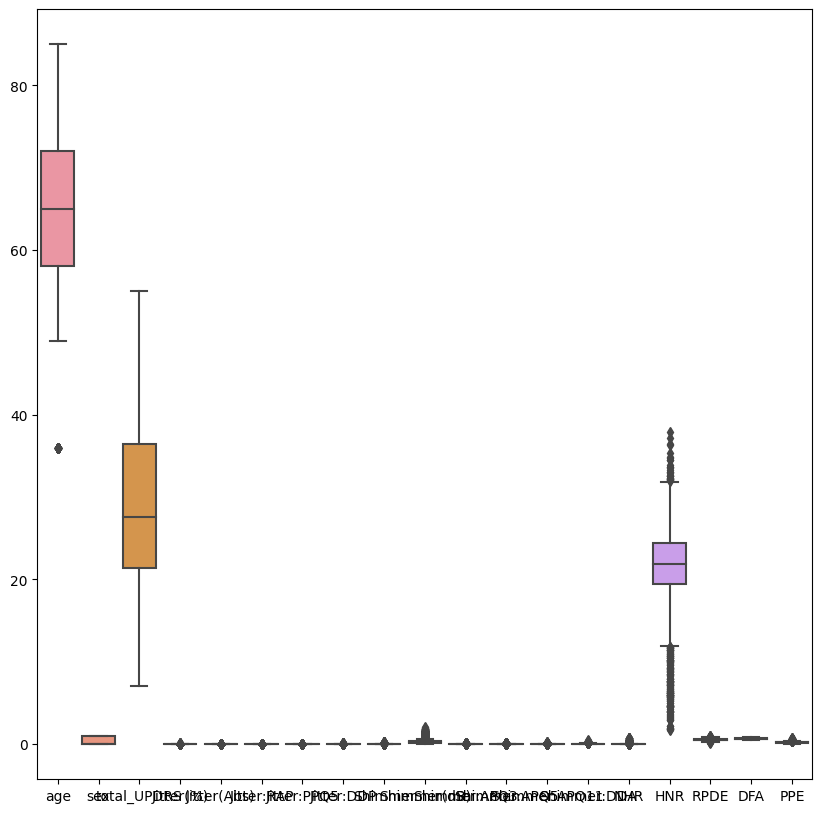

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(df)

In [13]:
mean_Hnr = df['HNR'].mean()
print(mean_Hnr)
sd_Hnr = df['HNR'].std()
print(sd_Hnr)

21.678435566133967
4.289832955005749


In [14]:
z_score  = (df['HNR'] - mean_Hnr)/sd_Hnr

In [15]:
df[(z_score > -2) & (z_score < 2)]

,age,sex,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
1,72,0,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
2,72,0,34.894,0.00300,0.000017,NaN,0.00150,0.00395,0.02024,0.179,0.00994,NaN,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100
3,72,0,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140
4,72,0,35.810,0.00528,0.000027,0.00191,NaN,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,NaN,24.445,0.48730,0.57794,0.332770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,61,0,32.988,NaN,0.000025,0.00119,0.00147,0.00360,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,NaN,0.126210
5879,61,0,32.495,0.00349,0.000025,0.00152,0.00187,0.00360,0.02499,NaN,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,NaN,0.57888,0.141570
5880,61,0,32.007,0.00281,0.000020,0.00128,0.00151,0.00360,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.142040
5881,61,0,31.513,0.00282,0.000021,0.00135,0.00166,0.00360,0.01907,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.153360


In [16]:
df1  = df[(z_score > -2) & (z_score < 2)]

In [17]:
df['Jitter:RAP'].median()

0.00225

In [18]:
df1['sex'].unique()

array([0, 1], dtype=int64)

In [19]:
df1.shape

(5620, 19)

<Axes: >

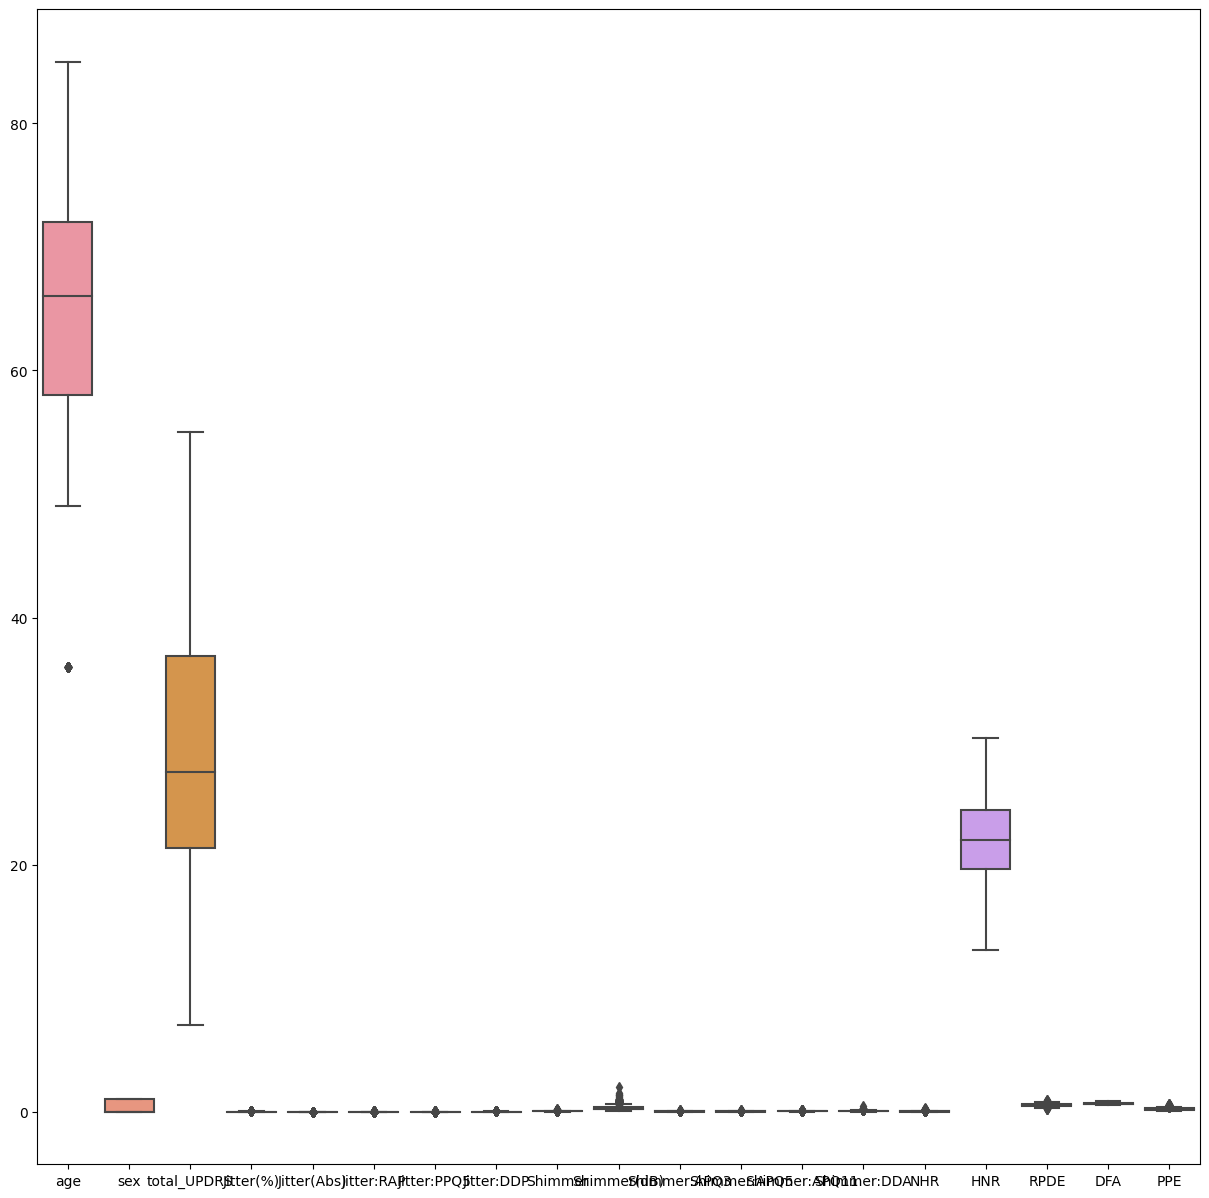

In [20]:
plt.figure(figsize=(15,15))
sns.boxplot(df1)

In [21]:
df2 = df1.fillna(df1.median())

In [22]:
df2.isnull().sum()

age              0
sex              0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [23]:
df3 = df2.copy()

In [24]:
df3.head()

,age,sex,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.013090,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.013090,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
2,72,0,34.894,0.00300,0.000017,0.00222,0.00150,0.00395,0.02024,0.179,0.00994,0.015705,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
3,72,0,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.008440,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
4,72,0,35.810,0.00528,0.000027,0.00191,0.00246,0.00573,0.02309,0.327,0.01106,0.012650,0.01963,0.03317,0.018117,24.445,0.48730,0.57794,0.33277


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'total_UPDRS'}>,
        <Axes: title={'center': 'Jitter(%)'}>],
       [<Axes: title={'center': 'Jitter(Abs)'}>,
        <Axes: title={'center': 'Jitter:RAP'}>,
        <Axes: title={'center': 'Jitter:PPQ5'}>,
        <Axes: title={'center': 'Jitter:DDP'}>],
       [<Axes: title={'center': 'Shimmer'}>,
        <Axes: title={'center': 'Shimmer(dB)'}>,
        <Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>],
       [<Axes: title={'center': 'Shimmer:APQ11'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>, <Axes: title={'center': 'HNR'}>],
       [<Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>,
        <Axes: >]], dtype=object)

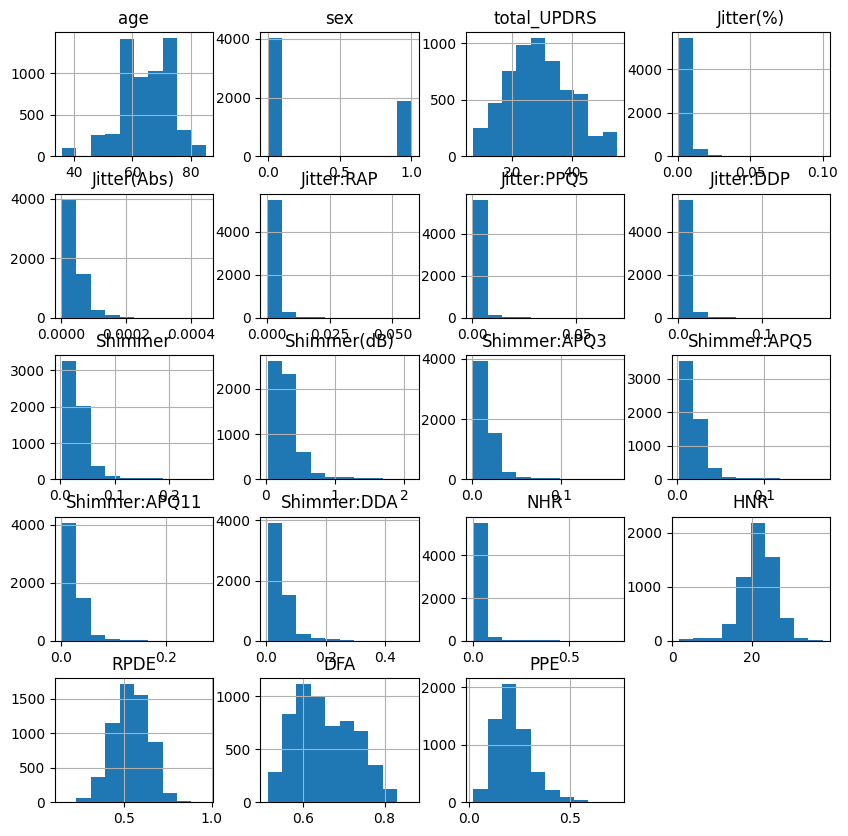

In [26]:
df.hist(figsize=(10,10))

In [27]:
X = df3.drop(['total_UPDRS'], axis=1)
y = df3['total_UPDRS']

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.20 , random_state = 5)

In [29]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [30]:
y_pred1 = model.predict(xtest)

In [31]:
# Evaluate the model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(ytest, y_pred1)
mae = mean_absolute_error(ytest, y_pred1)
r2 = r2_score(ytest, y_pred1)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2_score (R2): {r2}')

Mean Squared Error: 9.77437292878122
Mean Absolute Error: 2.251894416370107
R2_score (R2): 0.9209375852775495
